## Topic:

In business, companies invest significant resources in designing new products, marketing initiatives, and enhancing customer retention efforts. However, allocating budgets to support these efforts without understanding of customer needs and behaviors is akin to a navigator without a compass or a chef without a recipe. Thus, to drive success, enhance competitiveness and stay ahead in the market, companies try to analyze its customers continuously.
Customer personality analysis helps businesses group their customers into meaningful segments to address their unique needs and create personalized marketing campaigns. It also helps identify low-value and high value customers and develop strategies to enhance their satisfaction. 
Multiple teams in the company would be interested in solving this problem such as marketing teams, sales teams, product development teams and finally executive and decision makers who will be guided in their business strategy and resources allocation.


## Data Selection:

The data for this project was sourced from the open data platform Kaggle. The link to the dataset is https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
The dataset encompasses a range of 29 features that provide valuable insights for solving this problem, including customers' demographics and personal traits, shopping experiences, behavioral patterns, and any recorded complaints.

## Objective:

My objective is to segment the customers into meaningful groups, based on some or all the features in the dataset, to help stakeholders take informative decisions for optimizing their marketing strategy.

## Importing Libraries:

In [199]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer


## Data loading:

In [200]:
# load data
pd.set_option('display.max_columns', None)
df = pd.read_csv(r"C:\Users\sanas\OneDrive\Desktop\DSC630 datasets\marketing_campaign.csv", sep="\t")

In [201]:
# view first few rows of data
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [202]:
# overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [203]:
# display the shape of data
df.shape

(2240, 29)

In [204]:
# display the columns in the data
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

## Data Cleaning:

### 1- Check and Handle Missing Data:

In [205]:
# check for null values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [206]:
# replace the null values in the 'Income' column with the Income mean:
mean_income = df['Income'].mean()
df['Income'].fillna(mean_income, inplace=True)

### 2- Find and Handle Duplicates:

In [207]:
# check for duplicates
duplicates = df.duplicated().sum()
print("The dataset contains {} duplicates.".format(duplicates))

The dataset contains 0 duplicates.


### 3- Create New column 'Children' instead of 'kidhome' and 'Teenhome' :

In [208]:
# Create one column for 'children' instead of 'Kidhome' and 'Teenhome'
df['Children'] = df['Kidhome'] + df['Teenhome']

In [209]:
# drop the columns 'Kidhome' and 'Teenhome'
df = df.drop (columns = ['Kidhome','Teenhome'], axis=1)

### 5- Replacing Values:

In [210]:
# find the unique values for the column 'Marital_Status'
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [211]:
# Replace the values ('Single', 'Divorced', 'Widow', 'Alone') with the value 'No_Partner' and the values ('Together', 'Married') with the value 'With_Partner'
df['Marital_Status'] = df['Marital_Status'].replace ({'Together': 'With_Partner', 'Married': 'With_Partner', 'Divorced':'No_Partner', 'Widow':'No_Partner', 'Alone':'No_Partner', 'Single':'No_Partner'})

The entries 'YOLO' mostly standing for 'You Only Live Once' and 'Absurd' represent 4 entries. They may be listed in the context of jokes. It is not clear and doesn't make sense. So, I prefer to replace them with the most common entry.

In [212]:
# Replace the values 'Absurd' and 'YOLO' by the mode of that column.

In [213]:
# Calculate the mode of 'Marital_Status' column, excluding invalid values
mode_value = df.loc[~df['Marital_Status'].isin(['YOLO', 'Absurd']), 'Marital_Status'].mode()[0]
# replace 'YOLO' and 'Absurd' with mode value
df['Marital_Status'] = df['Marital_Status'].replace({'YOLO': mode_value, 'Absurd':mode_value })


In [214]:
# find unique values of column 'Education':
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [215]:
# replace the value 'Graduation' with 'Graduate', 'PhD' and 'Master' with 'Postgraduate' 
df['Education'] = df['Education'].replace({'Graduation': 'Graduate+', 'PhD': 'Graduate+', 'Master':'Graduate+', '2n Cycle': 'Graduate+'})


In [216]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children
0,5524,1957,Graduate+,No_Partner,58138.0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduate+,No_Partner,46344.0,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Graduate+,With_Partner,71613.0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduate+,With_Partner,26646.0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1
4,5324,1981,Graduate+,With_Partner,58293.0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1


In [217]:
df.Education.unique()

array(['Graduate+', 'Basic'], dtype=object)

### 6- Convert the column 'Dt_Customer' to datetime format:

In [218]:
# convert the column 'Dt_Customer' to date format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

The customers are recorded as customers with the retail company at that date, we may create a feature of 'customer_for' corresponding to the period being customer if we will use it in modeling.

## Data Exploration:

### 1- Descriptive Statistics:

In [219]:
df.describe()

,ID,Year_Birth,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children
count,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,0.950446
min,0.000000,1893.000000,1730.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000
75%,8427.750000,1977.000000,68289.750000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000
max,11191.000000,1996.000000,666666.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,3.000000
std,3246.662198,11.984069,25037.797168,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,0.751803


- The average age of customers is 56 years old.
- The mean income of customers is 52247 dollars and the average total spending is nearly 606 dollars.
- 75% of customers are paid 68289 dollars or less. 
- The average recency is about 49 days.

### 2- Data Visualization:

In [220]:
# - Barplot of customers' Marital Status

In [221]:
# group by marital status and count
maritalStatus_data = df.groupby('Marital_Status')['Marital_Status'].count()
maritalStatus_data

Marital_Status
No_Partner       792
With_Partner    1448
Name: Marital_Status, dtype: int64

Text(0.5, 1.0, 'Customers Marital Status')

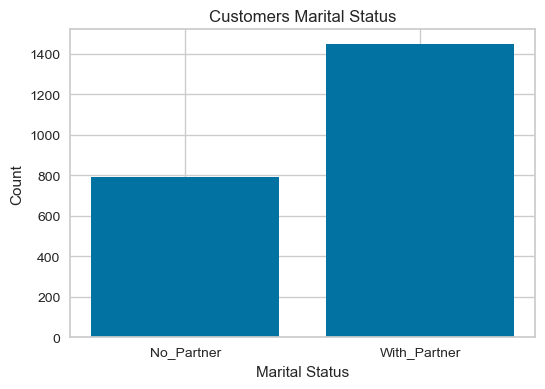

In [222]:
# create plot
plt.figure(figsize=(6,4))
plt.bar(maritalStatus_data.index, maritalStatus_data)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Customers Marital Status')


Customers are often categorized as part of a couple.

In [223]:
## - Barplot of customers Education:

In [224]:
# group by Education and count
Education_data = df.groupby('Education')['Education'].count()
Education_data

Education
Basic          54
Graduate+    2186
Name: Education, dtype: int64

Text(0.5, 1.0, 'Distribution of Customers Education Levels')

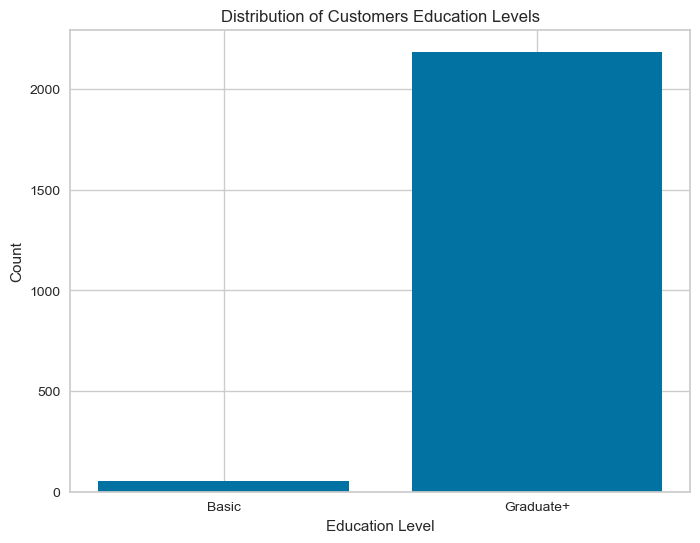

In [225]:
# create plot
plt.figure(figsize=(8,6))
plt.bar(Education_data.index, Education_data.values)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Customers Education Levels')


Customers have mostly higher education, while few of them have basic education.

In [226]:
## - A Stacked bar chart revealing spending on various products:

In [227]:
# group by marital status and sum the spending in the columns of product categories
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
spending_data = df.groupby('Education')[spending_columns].sum()

In [228]:
spending_data

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Education,,,,,,
Basic,391,600,618,921,654,1233
Graduate+,680425,58317,373350,83136,59967,97376


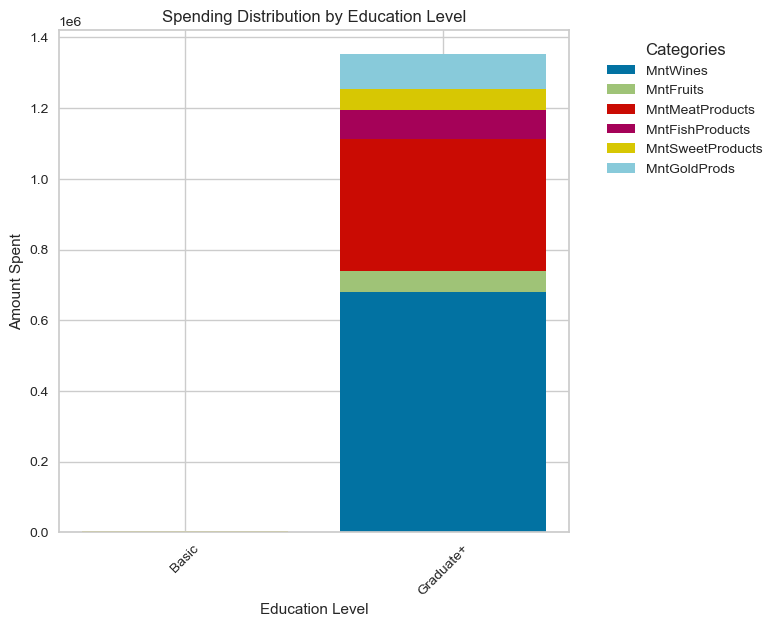

In [229]:
# create plot
plt.figure(figsize=(8,6))
x= np.arange(len(spending_data.index)) # x-axis positions
bottom = np.zeros(len(spending_data.index)) # initialize bottom to zero for stacking
for column in spending_data.columns: # loop through columns for stacking
    plt.bar(x, spending_data[column], bottom=bottom, label=column)
    bottom += spending_data[column]
plt.title('Spending Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Amount Spent')
plt.legend(title='Categories', loc='upper left', bbox_to_anchor = (1.05, 1))
plt.tight_layout()
plt.xticks(x, spending_data.index, rotation=45)
plt.show()

Customers with highest education levels (graduate and postgraduate) are high spenders compared to customers with basic education, and they spend more in wines and meat products. 

In [230]:
## - Correlation matrix on spending columns and purchase channels:

In [231]:
spending_purchaseChannel_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']


In [232]:
# create the correlation matrix
corr_matrix = df[spending_purchaseChannel_columns].corr()

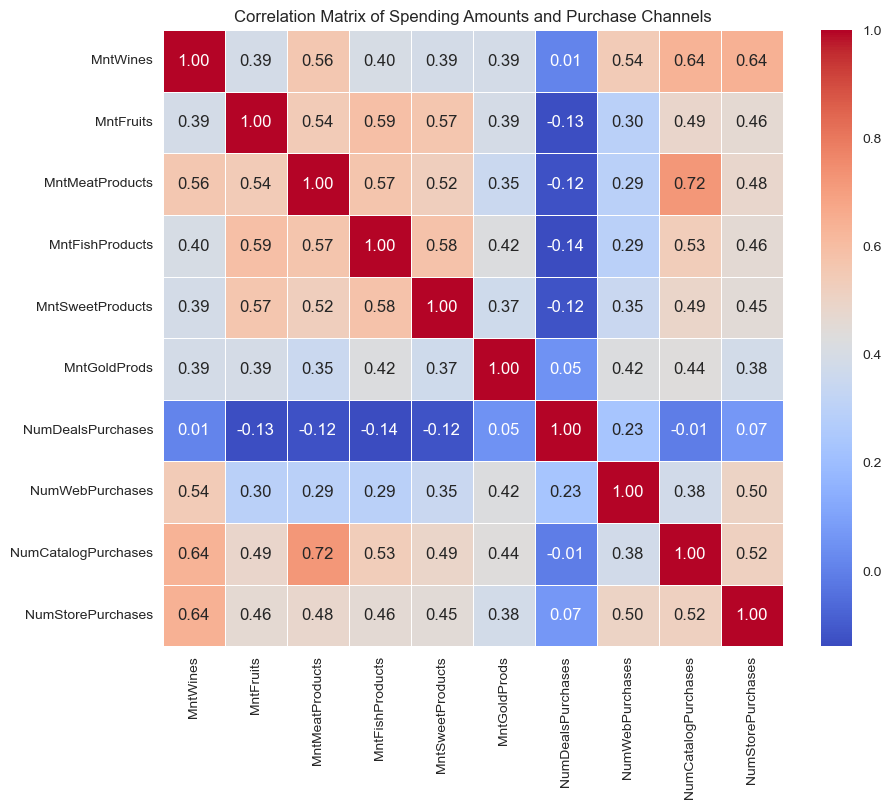

In [233]:
# Plotting
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Spending Amounts and Purchase Channels')
plt.show()

There is a very strong and consistent correlation between the number of store purchases and spending amounts in Wine. Additionally, a correlation coefficient of 0.72 between Amounts of Meat Products and number of Catalog purchases indicates a significant correlation between the two variables.

In [234]:
# - A bar plot comparing the number of purchases per Channel:

In [235]:
purchase_channels = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']
# group by marital status and compute the number of purchases in each channel
purchaseChannels_data = df.groupby('Marital_Status')[purchase_channels].sum()
# calculate the total number of purchases per channel
total_purchaseChannels_data = purchaseChannels_data.sum() 
total_purchaseChannels_data


NumDealsPurchases       5208
NumWebPurchases         9150
NumCatalogPurchases     5963
NumStorePurchases      12970
dtype: int64

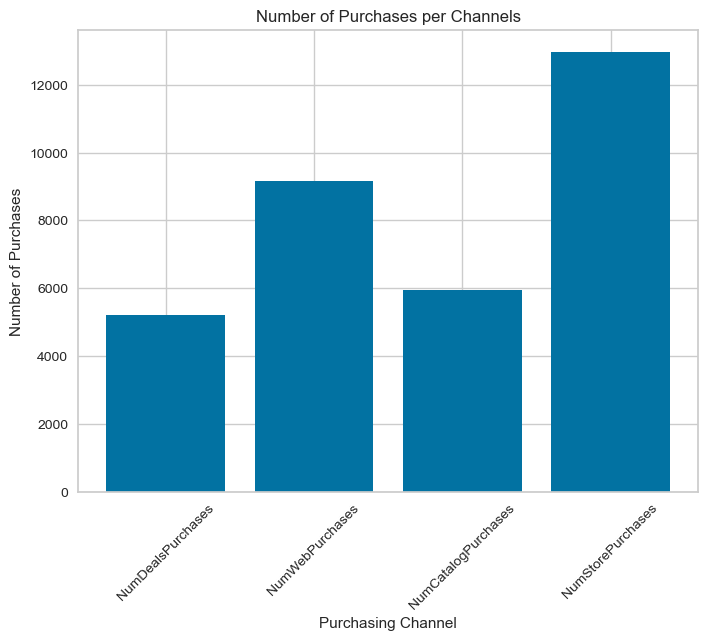

In [236]:
# create bar plot
plt.figure(figsize=(8,6))
plt.bar(total_purchaseChannels_data.index, total_purchaseChannels_data.values)
plt.xlabel("Purchasing Channel")
plt.ylabel("Number of Purchases")
plt.title("Number of Purchases per Channels")
plt.xticks(rotation=45)
plt.show()

Customers predominantly make purchases in person at the store, followed by online transactions, with catalog and deals purchases being the least common.

In [237]:
# - A Bar chart showing acceptance rate per Marketing Campaign. 

In [238]:
acceptance_data = df.groupby('Marital_Status')[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].mean()
total_acceptance_data = acceptance_data.sum()
total_acceptance_data

AcceptedCmp3    0.148606
AcceptedCmp4    0.150225
AcceptedCmp5    0.142314
AcceptedCmp1    0.126904
AcceptedCmp2    0.027010
dtype: float64

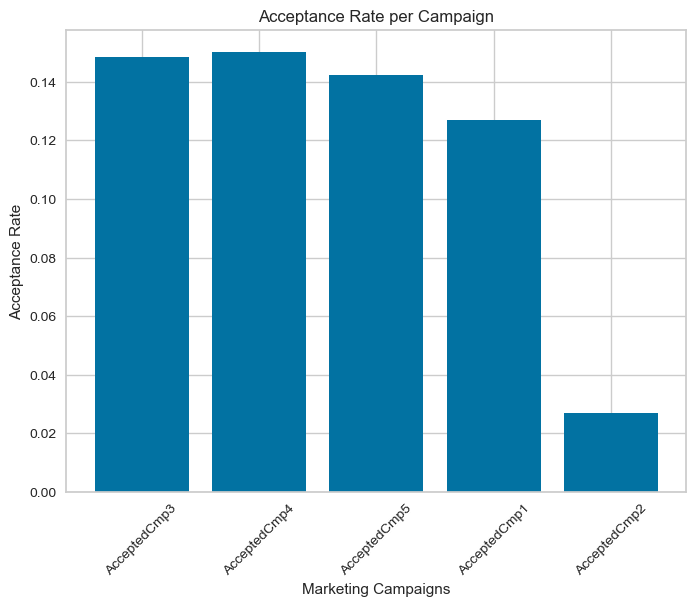

In [239]:
# create bar plot
plt.figure(figsize=(8,6))
plt.bar(total_acceptance_data.index, total_acceptance_data.values)
plt.xlabel("Marketing Campaigns")
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate per Campaign")
plt.xticks(rotation=45)
plt.show()

The Top marketing campaigns are notably the campaigns 4, 3, 5 followed with campaign 1 with a rate more than 12%. 

The acceptance rates across different campaigns are relatively similar, except for Campaign 2, which has the lowest acceptance rate. This helps stakeholders to optimize their resource allocation effectively.

In [240]:
# - Pie Chart illustrating the Distribution of complaints:

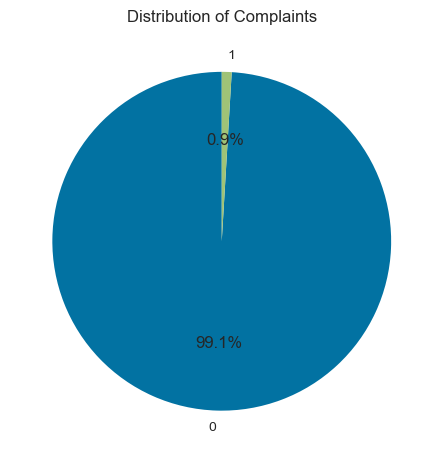

In [241]:
# create pie chart
df['Complain'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Complaints')
plt.ylabel('')
plt.show()

Only about 1% of customers filed complaints. This might indicate their satisfaction.

## Data preparation for Modeling:

### 1- Deriving new features from existing data.:

In [242]:
# create 'Age' column for customers
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

In [243]:
# create 'Age_Groups' column
## create the function grouping_age.
def grouping_age(Age):
    if Age <= 35:
        return 'Young'
    else:
        return 'Adult'
    
# apply the function to the column 'Age'
df['Age_Groups'] = df['Age'].apply(grouping_age)  

In [244]:
# create the new column "Total Spending"
df['Total_Spending'] = df['MntWines'] + df['MntFruits']+ df['MntMeatProducts']+ df['MntFishProducts'] + df['MntSweetProducts']+ df['MntGoldProds']

In [245]:
# create total 'Spending_from_income' feature:
df['Spending_from_income'] = (df['Total_Spending'] / df['Income']) * 100

In [246]:
#Feature pertaining parenthood
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

In [247]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,Age,Age_Groups,Total_Spending,Spending_from_income,Is_Parent
0,5524,1957,Graduate+,No_Partner,58138.0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,68,Adult,1617,2.781313,0
1,2174,1954,Graduate+,No_Partner,46344.0,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,71,Adult,27,0.058260,1
2,4141,1965,Graduate+,With_Partner,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,60,Adult,776,1.083602,0
3,6182,1984,Graduate+,With_Partner,26646.0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1,41,Adult,53,0.198904,1
4,5324,1981,Graduate+,With_Partner,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,44,Adult,422,0.723929,1


### 2- Filter the data

In [248]:
# columns we will use for clustering
columns_to_use = ['Income',
        'Is_Parent',
       'Age_Groups', 'Spending_from_income']

In [249]:
# create a dataframe for these columns 
df2 = df[columns_to_use]
df2.head()

,Income,Is_Parent,Age_Groups,Spending_from_income
0,58138.0,0,Adult,2.781313
1,46344.0,1,Adult,0.058260
2,71613.0,0,Adult,1.083602
3,26646.0,1,Adult,0.198904
4,58293.0,1,Adult,0.723929


### 3- Finding outliers and Handling them:

In [250]:
# define numerical and categorical features
numerical_features = df2.select_dtypes(include=np.number).columns
categrical_features = df2.select_dtypes(include=object).columns

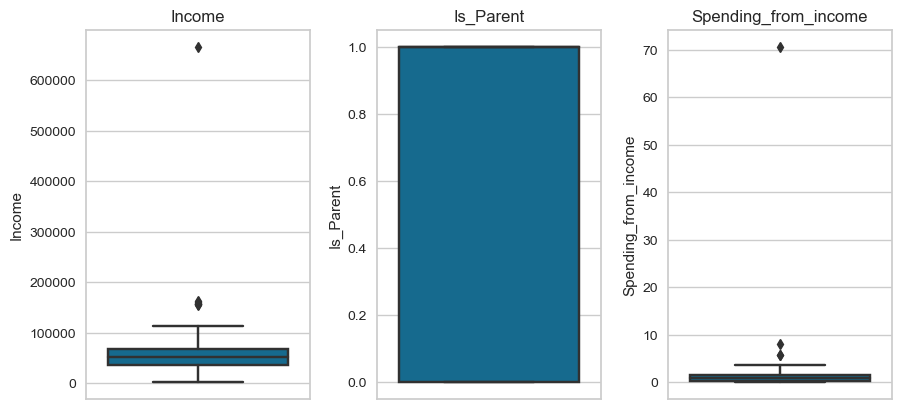

In [251]:
# check for outliers:
# Boxplot Method:
plt.figure(figsize=(15, 12)) 
for i, col in enumerate(numerical_features):
    plt.subplot(3, 5, i + 1)  
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout() 
plt.show()

- For income, An amount more than 600000 seems unrealistic, regarding that the average is less than 100000.
- The Total_Spending and Spending_from_income have clear outliers, suggesting that some customers are big spenders while others tend to spend high proportion of their income.

In [252]:
# Handling outliers:

In [253]:
df2[df2['Income']>600000]

,Income,Is_Parent,Age_Groups,Spending_from_income
2233,666666.0,1,Adult,0.0093


In [254]:
df[df['Spending_from_income']>30]

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,Age,Age_Groups,Total_Spending,Spending_from_income,Is_Parent
21,5376,1979,Graduate+,With_Partner,2447.0,2013-01-06,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,0,0,0,0,3,11,0,1,46,Adult,1730,70.698815,1


This is unrealistic, an income exceeding 600000 dollars witha total spending of 62 dollars during two years. Also, a customer with annual income of 2447 dollars, probably not working, with total spending of 1730 dollars. Probably, these  are errors. Then, I prefer to remove outliers to get better modeling results. 

In [255]:
# function to remove outliers using IQR
def remove_outliers(df, columns, threshold=1.5):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (threshold * IQR)
        upper_bound = Q3 + (threshold * IQR)
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply to numerical features
df2 = remove_outliers(df2, numerical_features)


In [256]:
# reset indexes:
df2 = df2.reset_index(drop=True)

In [257]:
df2.head()

,Income,Is_Parent,Age_Groups,Spending_from_income
0,58138.0,0,Adult,2.781313
1,46344.0,1,Adult,0.058260
2,71613.0,0,Adult,1.083602
3,26646.0,1,Adult,0.198904
4,58293.0,1,Adult,0.723929


### 4- Computing a Correlation matrix to the remaining columns:

In [258]:
corr_matrix = df2[numerical_features].corr()
print(corr_matrix)

                        Income  Is_Parent  Spending_from_income
Income                1.000000  -0.411085              0.707845
Is_Parent            -0.411085   1.000000             -0.482731
Spending_from_income  0.707845  -0.482731              1.000000


### 5- Apply One Hot Encoding to categorical data:

In [259]:
# Apply ordinal encoding for categorical data
df2 = pd.get_dummies(df2, columns=["Age_Groups"], drop_first=True)


In [260]:
bool_columns = df2.select_dtypes(include=bool).columns
df2[bool_columns] = df2[bool_columns].astype(int)

In [261]:
df2.head()

,Income,Is_Parent,Spending_from_income,Age_Groups_Young
0,58138.0,0,2.781313,0
1,46344.0,1,0.058260,0
2,71613.0,0,1.083602,0
3,26646.0,1,0.198904,0
4,58293.0,1,0.723929,0


### 6- Data Scaling:

In [262]:
df2.columns

Index(['Income', 'Is_Parent', 'Spending_from_income', 'Age_Groups_Young'], dtype='object')

In [263]:
# apply min max scaler to the data
columns_to_scale = ['Income', 'Spending_from_income']
scaler = MinMaxScaler()
df2[columns_to_scale] = scaler.fit_transform(df2[columns_to_scale])

In [264]:
# check the scaling done
df2.head()

,Income,Is_Parent,Spending_from_income,Age_Groups_Young
0,0.503625,0,0.786235,0
1,0.398325,1,0.010012,0
2,0.623933,0,0.302292,0
3,0.222456,1,0.050104,0
4,0.505009,1,0.199765,0


### 8- Applying PCA to Scaled data:

In [265]:
# Apply PCA to our scaled data to reduce to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df2)
df2_pca = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])


In [266]:
df2_pca.head()

,PCA1,PCA2
0,0.826276,-0.169978
1,-0.349704,0.111749
2,0.713446,0.106861
3,-0.374592,0.186689
4,-0.273714,-0.087567


## Data Modeling: 

### 1-Implementing K_Means model:

Elbow Method to determine the number of clusters to be formed:


C:\Users\sanas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\sanas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\sanas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\sanas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

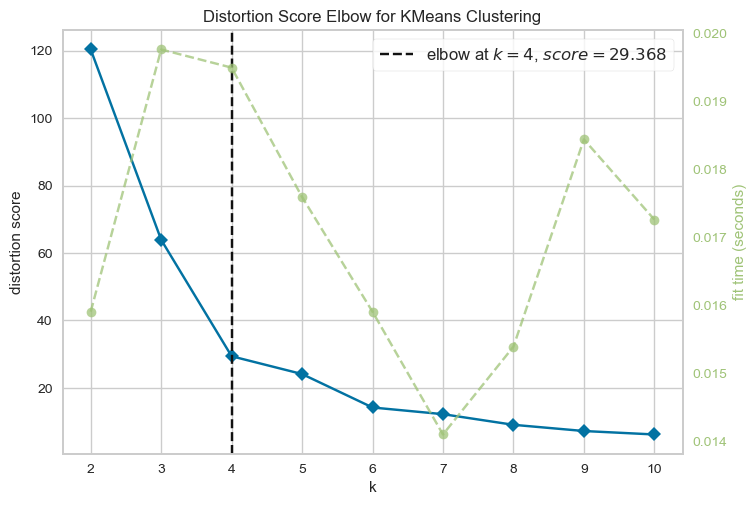

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [267]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=42), k=10, locate_elbow=True, timings=True)
Elbow_M.fit(df2_pca)
Elbow_M.show()

In [268]:
# Final K_Means Model
kmeans = KMeans(n_clusters = 4, random_state=42, n_init = 10)
df2_pca['Cluster'] = kmeans.fit_predict(df2_pca)

C:\Users\sanas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


In [269]:
print(df2_pca['Cluster'].unique())
print(df2_pca['Cluster'].value_counts())

[3 2 0 1]
Cluster
2    998
0    597
3    485
1    148
Name: count, dtype: int64


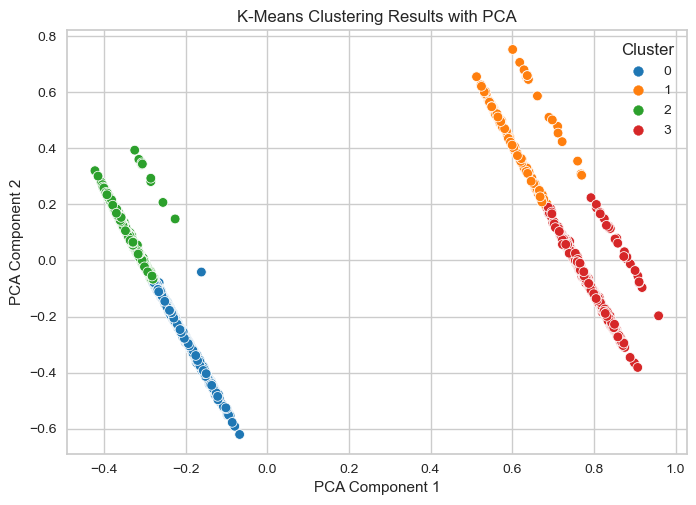

In [270]:
# Visualize Clusters
sns.scatterplot(x=df2_pca['PCA1'], y=df2_pca['PCA2'], hue=df2_pca['Cluster'], palette='tab10')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Results with PCA')
plt.show()

In [271]:
# Evaluate the model
silhouette_avg = silhouette_score(df2_pca.drop(columns=['Cluster']), df2_pca['Cluster'])
print(f'Silhouette Score for K-Means with PCA: {silhouette_avg:.4f}')

Silhouette Score for K-Means with PCA: 0.6674


The silhouette score is for the K_Means model is about to 0.67. That means that the model is strong and well-formed. The clusters are clear according to their colors. 

### 2- Hierarchical Clustering:

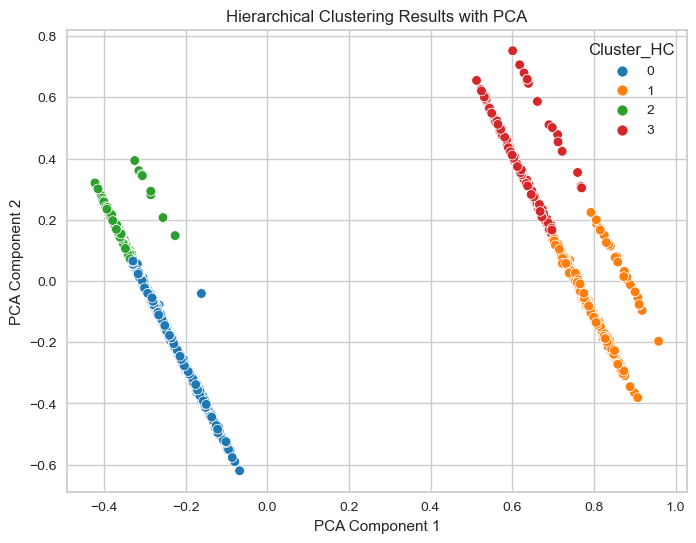

In [272]:
# Fit Hierarchical Clustering with optimal k
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
df2_pca['Cluster_HC'] = hc.fit_predict(df2_pca[['PCA1', 'PCA2']])

# Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df2_pca['PCA1'], y=df2_pca['PCA2'], hue=df2_pca['Cluster_HC'], palette='tab10')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Hierarchical Clustering Results with PCA')
plt.show()



In [273]:
# Evaluate silhouette score
silhouette_hc = silhouette_score(df2_pca[['PCA1', 'PCA2']], df2_pca['Cluster_HC'])
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_hc:.4f}')

Silhouette Score for Hierarchical Clustering: 0.5961


## Comparing Models:

In [274]:
# print the different silhouette scores
print("Silhouette Score for K-Means: ", silhouette_avg)
print("Silhouette Score for Hierarchical Clustering: ",silhouette_hc)

Silhouette Score for K-Means:  0.6674118290305413
Silhouette Score for Hierarchical Clustering:  0.5961312738649363


According to the silhouette scores values and to the previous clustering results visualizations, K-Means is a great model which is performing pretty well on the data better than hierarchical clustering.

In the clusters visualization, each color represents a different cluster.

## K-Means Clusters Interpretation:

In [275]:
df2_analysis = df2.copy()
df2_analysis['Cluster'] = df2_pca['Cluster']

# Compute mean values for each cluster
cluster_summary = df2_analysis.groupby('Cluster').mean()
print(cluster_summary)


           Income  Is_Parent  Spending_from_income  Age_Groups_Young
Cluster                                                             
0        0.544724        1.0              0.394607          0.001675
1        0.264141        0.0              0.138662          0.135135
2        0.311682        1.0              0.081128          0.010020
3        0.658000        0.0              0.523805          0.061856


In [276]:
# create a heatmap to see the most important features in each cluster

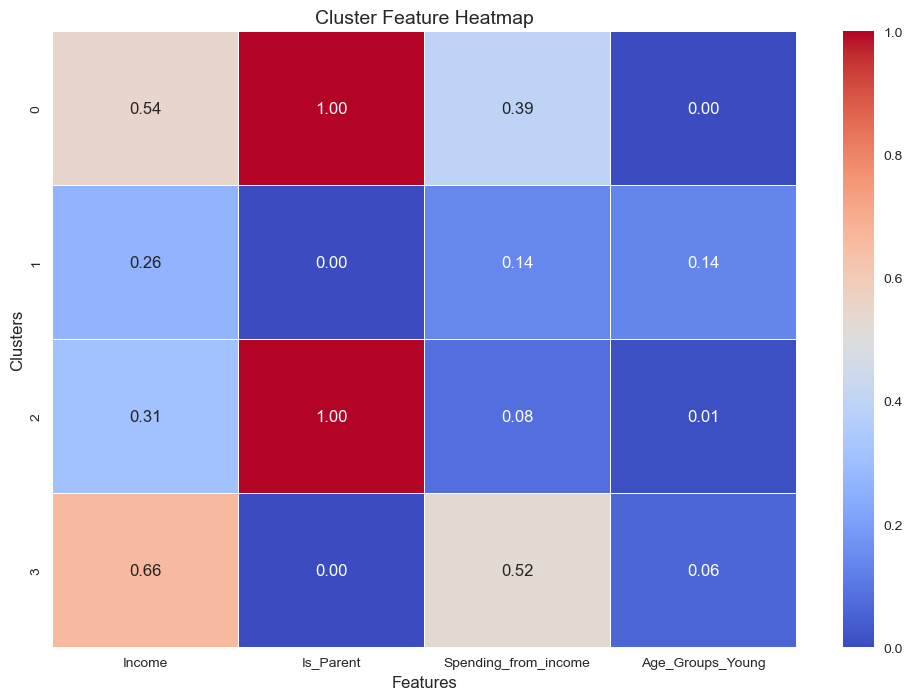

In [277]:
# Create the heatmap to see the most important features in each cluster
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Cluster Feature Heatmap", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Clusters", fontsize=12)
plt.show()

For clusters 0, the feature 'Income' is significantly important. Also, this feature 'Income' with the feature 'Spending from income' are also important in explaining the cluster 3. 

In [75]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
## Clusters Interpretation:

The modeling technique used led to four clusters, which can help stakeholders to optimize marketing technique.

###  Cluster 0: 
- Affluent parents, mostly middle-aged or older, with moderate spending habits. Likely stable households.
- I recommend promoting family deals and health-related products.
 

### Cluster 1:
- Young, single, low-income individuals with low spending. Possibly students or early-career professionals.
- My recommendation is to focus on low-cost or value-driven products

### Cluster 2: 

- Budget-conscious parents with lower incomes, likely middle-aged or older. They spend cautiously despite family responsibilities.
- My recommendation is to offer discounts and loyalty rewards

### Cluster 3: 

- Affluent non-parents with high spending behavior. Could be DINKs (dual-income no kids), professionals, or retirees with disposable income.
- Here, I recommend Upsell luxury or exclusive products and to create personalized offers.


